In [1]:
"""Create parameters.py and load it"""

# Directory for .inp file:
path = 'D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp'

# import libraries:
import importlib   # For reloading your own files
from termcolor import colored   # for colored error messages
# my own files:
try:
    import inp_data_extractor as inp
except:
    try:
        import Bubble_dynamics_simulation.inp_data_extractor as inp
    except:
        print(colored(f'Error, \'inp_data_extractor.py\' not found', 'red'))
importlib.reload(inp)   # reload changes you made
inp.extract(path)

import parameters as par   # numeric constants and coefficents
importlib.reload(par)   # reload changes you made
print(par.model)

path=D:/parameter_studies/Bubble_dynamics_simulation/INP file examples/chem_Otomo2018_without_O.inp
Note, lambda value for specie 'H' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH2' is not in data.py: 0.0 is used
Note, lambda value for specie 'NH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N' is not in data.py: 0.0 is used
Note, lambda value for specie 'NNH' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H4' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H3' is not in data.py: 0.0 is used
Note, lambda value for specie 'N2H2' is not in data.py: 0.0 is used
Note, lambda value for specie 'H2NN' is not in data.py: 0.0 is used
Warning, third body 'H2O' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
Warning, third body 'AR' is not in species in line 64 (' H2/2.5/ H2O/12/ AR/0.0/ ') in reaction 'H2+M=H+H+M'
model: chem_Otomo2018_without_O
File 'parameters.py' succesfully created
chem_O

In [2]:
"""Libraries"""

# for plotting:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np   # matrices, math
import os    # file management
import pandas as pd   # data frames
import importlib   # for reloading your own files
from termcolor import colored   # for colored error messages

# my own file:
already_imported = 'de' in globals()
try:
    import full_bubble_model as de
except:
    try:
        import Bubble_dynamics_simulation.full_bubble_model as de
    except:
        print(colored(f'Error, \'full_bubble_model.py\' not found', 'red'))
if already_imported: importlib.reload(de)   # reload changes you made

model: chem_Otomo2018_without_O
target specie: NH3
excitation: sin_impulse (control parameters: ['p_A', 'freq', 'n'])
enable heat transfer: True	enable evaporation: False	enable reactions: True	enable dissipated energy: True


In [49]:
cpar = de.dotdict(dict(
    ID = 0,                                      # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  50e-6,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['H2'], par.index['N2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.75, 0.25],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  293.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.10,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*s]
    c_L =  1483.00,                              # sound speed [m/s]
    surfactant =  1.00,                          # surfactant (surface tension modfier) [-]
  # Excitation parameters: (excitation_type = sin_impulse)
    p_A = -1.5e5,                                   # [Pa]
    freq = 10000.0,                                  # [Hz]
    n = 1.0,                                     # [-]
))

# Calculate pressure/temperature dependent parameters:
cpar.mu_L = de.Viscosity(cpar.T_inf)
cpar.P_v = de.VapourPressure(cpar.T_inf)

succecfully solved with LSODA solver


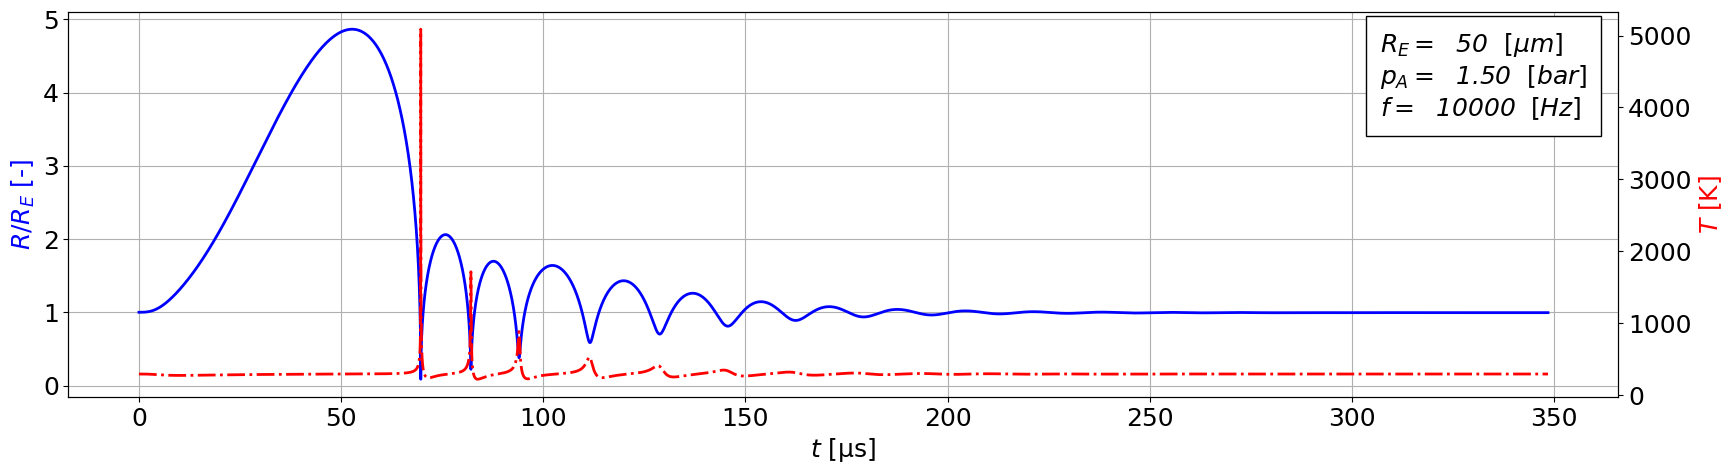

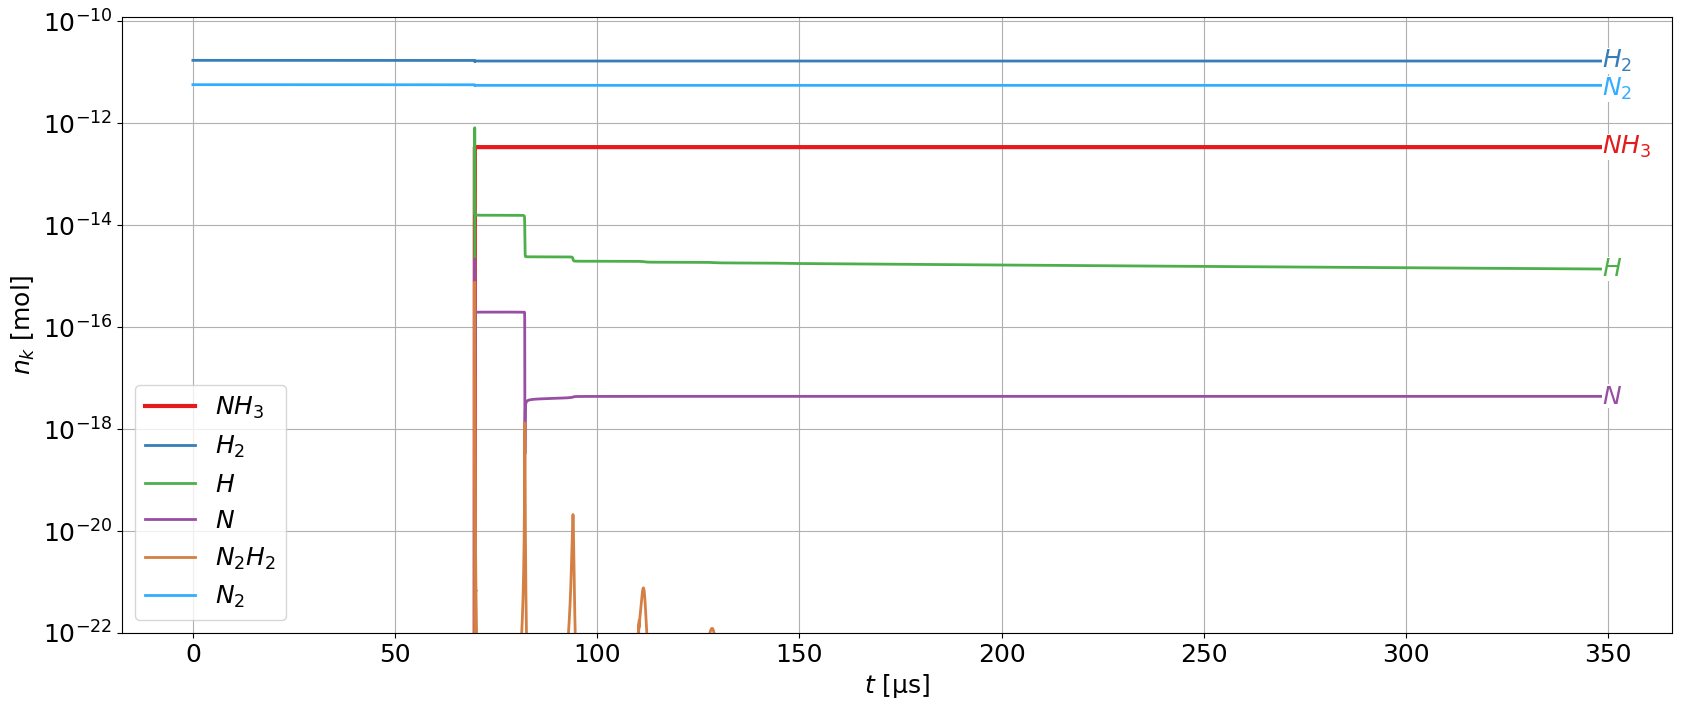

Control parameters:
    ID = 0,                                      # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00005000,                           # bubble equilibrium radius [m]
    ratio =  1.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['H2'], par.index['N2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.75, 0.25],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  293.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.34,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [50]:
if True:
    num_sol, error_code, elapsed_time = de.solve(cpar)
    data = de.get_data(cpar, num_sol, error_code, elapsed_time)
    presentation_mode = False
    
# Print errors
    errors, success = de.get_errors(error_code, printit=True)
    if not success:
        de.print_data(cpar, data)
    
# Calculations
    else:
        end_index = np.where(num_sol.t > 5.0 * data.collapse_time)[0][0]

    if num_sol.t[end_index] < 1e-3:
        t = num_sol.t[:end_index] * 1e6 # [us]
    else:
        t = num_sol.t[:end_index] * 1e3 # [ms]
    R = num_sol.y[0, :end_index] # [m]
    R_dot = num_sol.y[1, :end_index] # [m/s]
    T = num_sol.y[2, :end_index] # [K]
    c = num_sol.y[3:, :end_index] # [mol/cm^3]

    V = 4.0 / 3.0 * (100.0 * R) ** 3 * np.pi # [cm^3]
    n = c * V
    internal_pressure = np.sum(n, axis=0) * par.R_g * T / V # [MPa]

# plot R and T
    linewidth = 2.0 if presentation_mode else 2.0
    plt.rcParams.update({'font.size': 24 if presentation_mode else 18})
    fig1 = plt.figure(figsize=(16, 9) if presentation_mode else (20, 5))
    ax1 = fig1.add_subplot(axisbelow=True)
    ax2 = ax1.twinx() 
    ax1.plot(t, R / cpar.R_E, color = 'b', linewidth = linewidth)
    ax2.plot(t, T, color = 'r', linewidth = linewidth, linestyle = '-.')

    if num_sol.t[end_index] < 1e-3:
        ax1.set_xlabel('$t$ [μs]')
    else:
        ax1.set_xlabel('$t$ [ms]')
    ax1.set_ylabel('$R/R_E$ [-]', color = 'b')
    ax2.set_ylabel('$T$ [K]', color = 'r')
    if not presentation_mode: ax1.grid()
    
# textbox with initial conditions
    text = f"""{'$R_E=$'} {1e6*cpar.R_E: .0f}  $[\mu m]$
{'$p_A=$'} {-1e-5*cpar.p_A: .2f}  $[bar]$
{'$f=$'} {cpar.freq: .0f}  $[Hz]$"""
    if True and not presentation_mode:
        ax1.text(
            0.98, 0.95, # coordinates
            text, transform=ax1.transAxes,
            horizontalalignment='right', verticalalignment='top', multialignment='left',
            fontsize=18, fontstyle='oblique',
            bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 10},
        )
    
    plt.show()

# plot reactions
    plt.rcParams.update({'font.size': 24 if presentation_mode else 18})
    fig2 = plt.figure(figsize=(16, 9) if presentation_mode else (20, 8))
    ax = fig2.add_subplot(axisbelow=True)

    # plot the lines
        # use this to generate colors:
            # import seaborn as sns
            # colors = sns.color_palette('Set1', n_colors=10)
            # print(colors.as_hex()); colors
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#d48044', '#33adff', '#a65628', '#f781bf', '#d444ca', '#d4ae44']
    color_index = 0
    texts = []
    max_mol = np.max(n, axis=1) # maximum amounts of species [mol]
    indexes_to_plot = np.argsort(max_mol)[-10:] if len(max_mol) >= 10 else np.argsort(max_mol) # Get the indexes of the 10 largest values
    for i, specie in enumerate(par.species):
        if not specie in ['NH3', 'N2', 'H2', 'N', 'H', 'N2H2']:
            continue
        name = specie
        for digit in range(10): # turns 'H2O2' into 'H_2O_2'
            name = name.replace(str(digit), '_' + str(digit))
        if True:
            color = colors[color_index]
            color_index = color_index + 1 if color_index < len(colors) - 1 else 0
            linewidth = 2.0 if presentation_mode and n[i, -1] > 1e-24 else 1.0
            linewidth = 3.0 if specie == 'NH3' else 2.0
            ax.plot(t, n[i], linewidth = linewidth, color=color, label = '$' + name + '$') # PLOT HERE
            if specie != 'N2H2':
                texts.append((color, name, n[i, -1]))            
        elif not presentation_mode:
            linewidth = 2.0 if presentation_mode else 1.0
            ax.plot(t, n[i], linewidth = linewidth, label = '$' + name + '$')  # PLOT HERE

    # make legend
    texts.sort(key=lambda x: x[-1], reverse=True)
    last_n_final = 1.0e100
    for text in texts:
        color, name, n_final = text
        # spaceing
        if n_final < 1e-24: continue
        limit = 5.5 if presentation_mode else 3.5
        if last_n_final / n_final < limit:
            n_final = last_n_final / limit
        last_n_final = n_final
        # place text
        ax.text(
            t[-1],
            n_final,
            '$' + name + '$',
            color=color,
            fontsize=24 if presentation_mode else 18,
            verticalalignment='center',
            bbox={'facecolor': 'white', 'pad': 0, 'linewidth': 0.0},
        )

    # plot settings
    ax.set_ylim([1e-22, 5.0*max_mol[indexes_to_plot[-1]]])
    ax.set_yscale('log')
    if num_sol.t[end_index] < 1e-3:
        ax.set_xlabel('$t$ [μs]')
    else:
        ax.set_xlabel('$t$ [ms]')
    ax.set_ylabel('$n_k$ [mol]')
    if not presentation_mode: ax.grid()
    if True: ax.legend()

    plt.show()
    
# print data
    de.print_data(cpar, data)

In [51]:
de.Make_dir('plots').write_solution(data, num_sol, 'sin_excited')

In [56]:
cpar = de.dotdict(dict(
    ID = 0,                                      # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  50e-6,                           # bubble equilibrium radius [m]
    ratio =  12.00,                               # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['H2'], par.index['N2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.75, 0.25],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  293.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.10,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*s]
    c_L =  1483.00,                              # sound speed [m/s]
    surfactant =  1.00,                          # surfactant (surface tension modfier) [-]
  # Excitation parameters: (excitation_type = sin_impulse)
    p_A = 0.0,                                   # [Pa]
    freq = 12000.0,                                  # [Hz]
    n = 1.0,                                     # [-]
))

# Calculate pressure/temperature dependent parameters:
cpar.mu_L = de.Viscosity(cpar.T_inf)
cpar.P_v = de.VapourPressure(cpar.T_inf)

succecfully solved with LSODA solver
Low pressure warning: The pressure during the expansion is lower, than the saturated water pressure


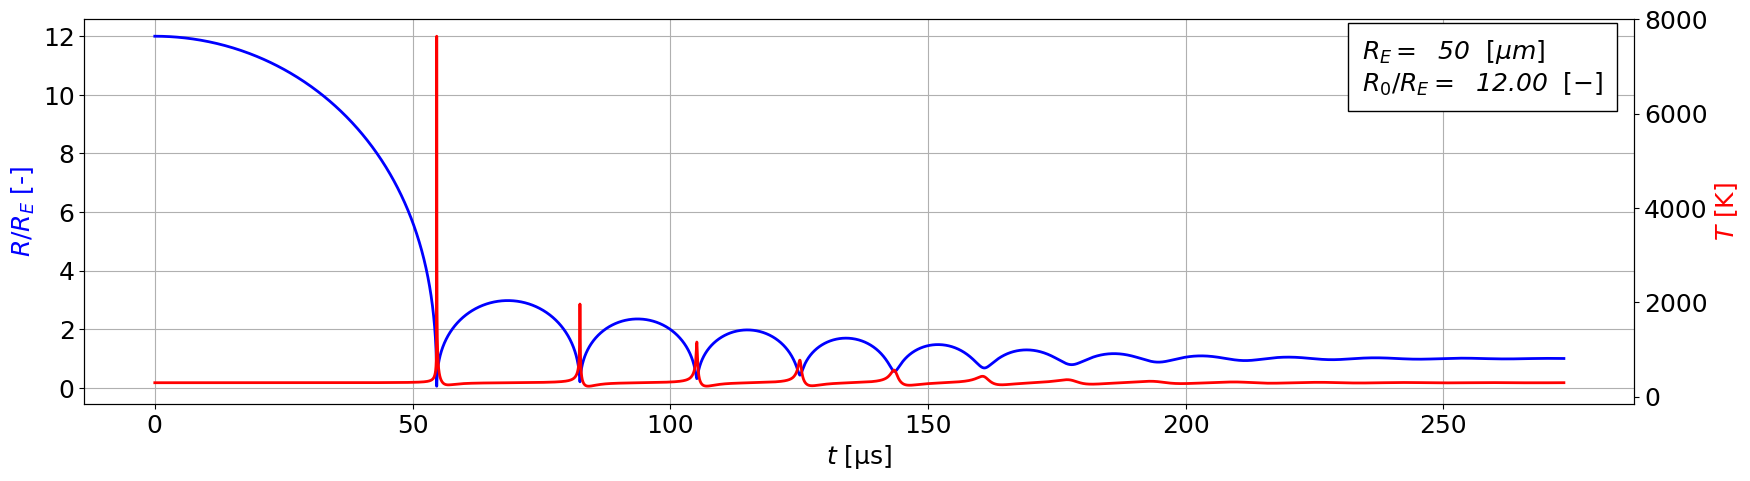

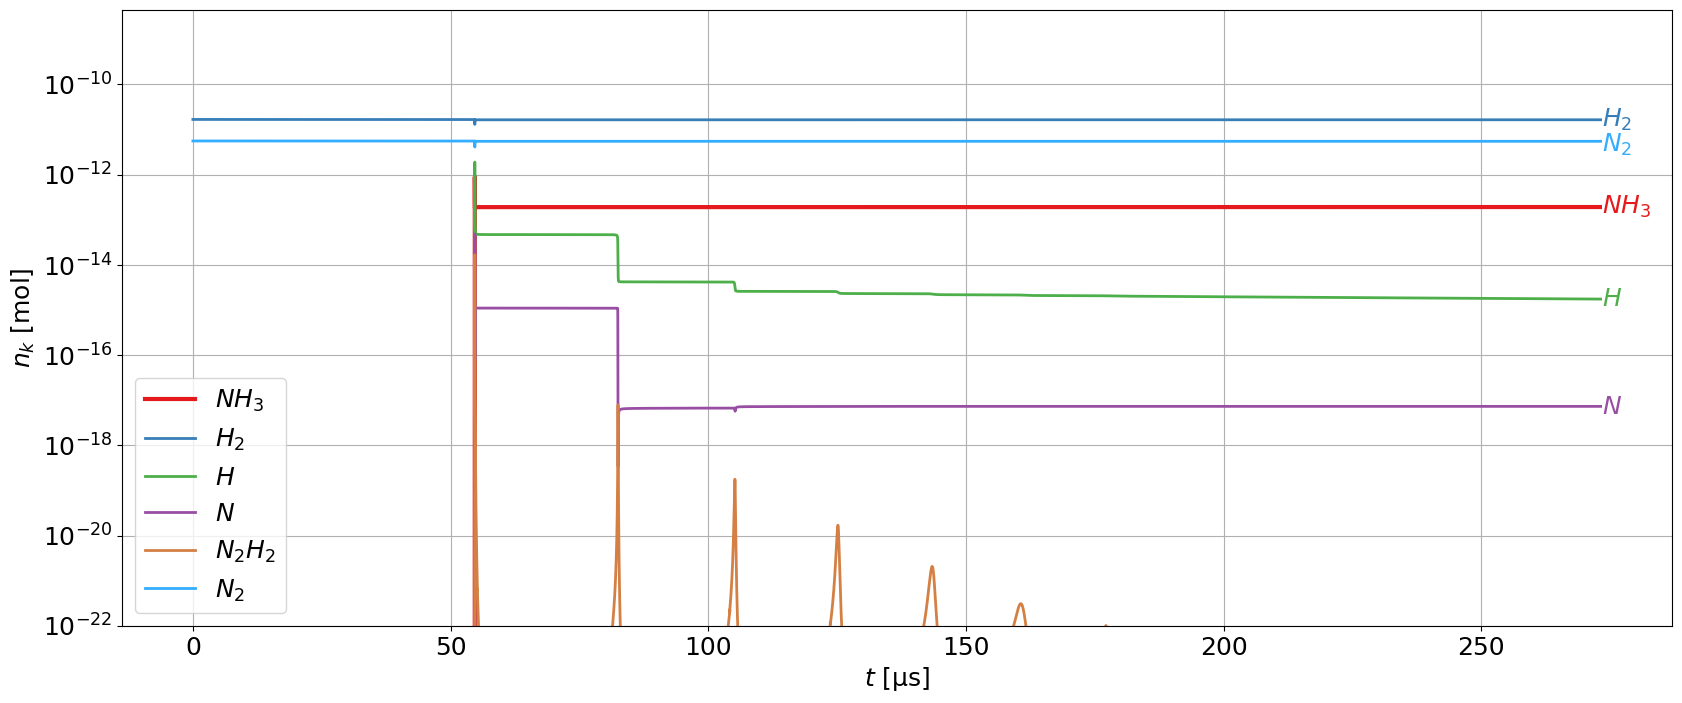

Control parameters:
    ID = 0,                                      # ID of control parameter (not used during calculation)
  # Initial conditions:
    R_E =  0.00005000,                           # bubble equilibrium radius [m]
    ratio =  12.00,                              # initial radius / equilibrium radius R_0/R_E [-]
    gases = [par.index['H2'], par.index['N2']],  # indexes of species in initial bubble (list of species indexes)
    fractions = [0.75, 0.25],                    # molar fractions of species in initial bubble (list of fractions for every gas)
  # Ambient parameters:
    P_amb =  101325.00,                          # ambient pressure [Pa]
    T_inf =  293.15,                             # ambient temperature [K]
  # Liquid parameters:
    alfa_M =  0.3500,                            # water accommodation coefficient [-]
    P_v =  2338.34,                              # vapour pressure [Pa]
    mu_L =  0.0010,                              # dynamic viscosity [Pa*

In [57]:
if True:
    num_sol, error_code, elapsed_time = de.solve(cpar)
    data = de.get_data(cpar, num_sol, error_code, elapsed_time)
    presentation_mode = False
    
# Print errors
    errors, success = de.get_errors(error_code, printit=True)
    if not success:
        de.print_data(cpar, data)
    
# Calculations
    else:
        end_index = np.where(num_sol.t > 5.0 * data.collapse_time)[0][0]

    if num_sol.t[end_index] < 1e-3:
        t = num_sol.t[:end_index] * 1e6 # [us]
    else:
        t = num_sol.t[:end_index] * 1e3 # [ms]
    R = num_sol.y[0, :end_index] # [m]
    R_dot = num_sol.y[1, :end_index] # [m/s]
    T = num_sol.y[2, :end_index] # [K]
    c = num_sol.y[3:, :end_index] # [mol/cm^3]

    V = 4.0 / 3.0 * (100.0 * R) ** 3 * np.pi # [cm^3]
    n = c * V
    internal_pressure = np.sum(n, axis=0) * par.R_g * T / V # [MPa]

# plot R and T
    linewidth = 2.0 if presentation_mode else 2.0
    plt.rcParams.update({'font.size': 24 if presentation_mode else 18})
    fig1 = plt.figure(figsize=(16, 9) if presentation_mode else (20, 5))
    ax1 = fig1.add_subplot(axisbelow=True)
    ax2 = ax1.twinx() 
    ax1.plot(t, R / cpar.R_E, color = 'b', linewidth = linewidth)
    ax2.plot(t, T, color = 'r', linewidth = linewidth, linestyle = '-')

    if num_sol.t[end_index] < 1e-3:
        ax1.set_xlabel('$t$ [μs]')
    else:
        ax1.set_xlabel('$t$ [ms]')
    ax1.set_ylabel('$R/R_E$ [-]', color = 'b')
    ax2.set_ylabel('$T$ [K]', color = 'r')
    if not presentation_mode: ax1.grid()
    
# textbox with initial conditions
    text = f"""{'$R_E=$'} {1e6*cpar.R_E: .0f}  $[\mu m]$
{'$R_0/R_E=$'} {cpar.ratio: .2f}  $[-]$"""

    if True and not presentation_mode:
        ax1.text(
            0.98, 0.95, # coordinates
            text, transform=ax1.transAxes,
            horizontalalignment='right', verticalalignment='top', multialignment='left',
            fontsize=18, fontstyle='oblique',
            bbox={'facecolor': 'white', 'alpha': 1.0, 'pad': 10},
        )
    
    plt.show()

# plot reactions
    plt.rcParams.update({'font.size': 24 if presentation_mode else 18})
    fig2 = plt.figure(figsize=(16, 9) if presentation_mode else (20, 8))
    ax = fig2.add_subplot(axisbelow=True)

    # plot the lines
        # use this to generate colors:
            # import seaborn as sns
            # colors = sns.color_palette('Set1', n_colors=10)
            # print(colors.as_hex()); colors
    colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#d48044', '#33adff', '#a65628', '#f781bf', '#d444ca', '#d4ae44']
    color_index = 0
    texts = []
    max_mol = np.max(n, axis=1) # maximum amounts of species [mol]
    indexes_to_plot = np.argsort(max_mol)[-10:] if len(max_mol) >= 10 else np.argsort(max_mol) # Get the indexes of the 10 largest values
    for i, specie in enumerate(par.species):
        if not specie in ['NH3', 'N2', 'H2', 'N', 'H', 'N2H2']:
            continue
        name = specie
        for digit in range(10): # turns 'H2O2' into 'H_2O_2'
            name = name.replace(str(digit), '_' + str(digit))
        if True:
            color = colors[color_index]
            color_index = color_index + 1 if color_index < len(colors) - 1 else 0
            linewidth = 2.0 if presentation_mode and n[i, -1] > 1e-24 else 1.0
            linewidth = 3.0 if specie == 'NH3' else 2.0
            ax.plot(t, n[i], linewidth = linewidth, color=color, label = '$' + name + '$') # PLOT HERE
            if specie != 'N2H2':
                texts.append((color, name, n[i, -1]))            
        elif not presentation_mode:
            linewidth = 2.0 if presentation_mode else 1.0
            ax.plot(t, n[i], linewidth = linewidth, label = '$' + name + '$')  # PLOT HERE

    # make legend
    texts.sort(key=lambda x: x[-1], reverse=True)
    last_n_final = 1.0e100
    for text in texts:
        color, name, n_final = text
        # spaceing
        if n_final < 1e-24: continue
        limit = 5.5 if presentation_mode else 3.5
        if last_n_final / n_final < limit:
            n_final = last_n_final / limit
        last_n_final = n_final
        # place text
        ax.text(
            t[-1],
            n_final,
            '$' + name + '$',
            color=color,
            fontsize=24 if presentation_mode else 18,
            verticalalignment='center',
            bbox={'facecolor': 'white', 'pad': 0, 'linewidth': 0.0},
        )

    # plot settings
    ax.set_ylim([1e-22, 5.0*max_mol[indexes_to_plot[-1]]])
    ax.set_yscale('log')
    if num_sol.t[end_index] < 1e-3:
        ax.set_xlabel('$t$ [μs]')
    else:
        ax.set_xlabel('$t$ [ms]')
    ax.set_ylabel('$n_k$ [mol]')
    if not presentation_mode: ax.grid()
    if True: ax.legend()

    plt.show()
    
# print data
    de.print_data(cpar, data)